In [8]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

from dotenv import load_dotenv
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import mplfinance as mpf

import pandas_ta as ta
# from talib.abstract import *

from securities_load.securities.postgresql_database_functions import sqlalchemy_engine
from securities_load.securities.securities_table_functions import retrieve_ohlcv_from_to
pd.__version__  # for the record

'2.2.2'

In [9]:
# Get parameters and set up a database connection
load_dotenv()
engine = sqlalchemy_engine()

True

In [10]:
# Get the data and have a look at it
exchange_code = "XASX"
ticker = 'BKW'
num_of_years = 2
start_date = dt.datetime.now() - dt.timedelta(int(365.25 * num_of_years))
start_string_date = dt.datetime.strftime(start_date, "%Y-%m-%d")
end_date = dt.datetime.now()
end_string_date = dt.datetime.strftime(end_date, "%Y-%m-%d")
end_string_datetime = dt.datetime.strftime(end_date, "%Y-%m-%d 00:00:00")
one_year_ago_date = dt.datetime.now() - relativedelta(months = 12)
one_year_ago_string_datetime = dt.datetime.strftime(one_year_ago_date, "%Y-%m-%d 00:00:00")
six_months_ago_date = dt.datetime.now() - relativedelta(months = 6)
six_months_ago_string_datetime = dt.datetime.strftime(six_months_ago_date, "%Y-%m-%d 00:00:00")
df = retrieve_ohlcv_from_to(engine, exchange_code=exchange_code, ticker=ticker, start_date=start_string_date, end_date=end_string_date)
df.info()
df.head(3)
df.tail(3)

Exchange_id is: 1
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2023-06-08 to 2025-06-06
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    506 non-null    object 
 1   open    506 non-null    float64
 2   high    506 non-null    float64
 3   low     506 non-null    float64
 4   close   506 non-null    float64
 5   volume  506 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.7+ KB


,date,open,high,low,close,volume
Datetime,,,,,,
2023-06-08,2023-06-08,24.8111,24.9060,24.5075,24.6973,173649
2023-06-09,2023-06-09,24.9535,25.0389,24.6783,24.6973,365233
2023-06-13,2023-06-13,24.8301,25.0009,24.7637,24.8017,131569


,date,open,high,low,close,volume
Datetime,,,,,,
2025-06-04,2025-06-04,34.98,35.20,32.90,33.37,803355
2025-06-05,2025-06-05,33.28,33.37,32.27,32.48,528034
2025-06-06,2025-06-06,32.02,32.56,32.02,32.42,301923


In [11]:

# Set up exponential moving averages 
df['ema_5'] = ta.ema(df["close"],length=5)
df['prior_ema_5'] = df['ema_5'].shift(1)
df['ema_20'] = ta.ema(df["close"],length=20)
df['prior_ema_20'] = df['ema_20'].shift(1)
df['ema_50'] = ta.ema(df["close"],length=50)
df['prior_ema_50'] = df['ema_50'].shift(1)
df['ema_200'] = ta.ema(df["close"],length=200)
df['prior_ema_200'] = df['ema_200'].shift(1)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2023-06-08 to 2025-06-06
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           506 non-null    object 
 1   open           506 non-null    float64
 2   high           506 non-null    float64
 3   low            506 non-null    float64
 4   close          506 non-null    float64
 5   volume         506 non-null    int64  
 6   ema_5          502 non-null    float64
 7   prior_ema_5    501 non-null    float64
 8   ema_20         487 non-null    float64
 9   prior_ema_20   486 non-null    float64
 10  ema_50         457 non-null    float64
 11  prior_ema_50   456 non-null    float64
 12  ema_200        307 non-null    float64
 13  prior_ema_200  306 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 59.3+ KB


,date,open,high,low,close,volume,ema_5,prior_ema_5,ema_20,prior_ema_20,ema_50,prior_ema_50,ema_200,prior_ema_200
Datetime,,,,,,,,,,,,,,
2025-06-02,2025-06-02,29.93,35.20,29.85,35.10,2415987,30.010765,27.466148,27.825192,27.059423,26.498202,26.147108,25.847373,25.754381
2025-06-03,2025-06-03,34.40,34.98,33.94,34.91,1192477,31.643843,30.010765,28.499936,27.825192,26.828076,26.498202,25.937548,25.847373
2025-06-04,2025-06-04,34.98,35.20,32.90,33.37,803355,32.219229,31.643843,28.963751,28.499936,27.084622,26.828076,26.011503,25.937548
2025-06-05,2025-06-05,33.28,33.37,32.27,32.48,528034,32.306153,32.219229,29.298632,28.963751,27.296206,27.084622,26.075866,26.011503
2025-06-06,2025-06-06,32.02,32.56,32.02,32.42,301923,32.344102,32.306153,29.595905,29.298632,27.497139,27.296206,26.138992,26.075866


In [12]:
def bull_bear(data, short, long):
    # Initialize the signal price arrays and flag
    sig_bull=[]
    sig_bear=[]
    prior_short = 'prior_' + short
    prior_long = 'prior_' + long

    # Iterate through the data to generate bullish and bearish signals
    for i in range(len(data)):
        # Bullish signal when 50 EMA is greater than 200 EMA and previous 50 EMA was less than or equal to 200 EMA
        if (df[short].iloc[i] > df[long].iloc[i]) & (df[prior_short].iloc[i] <= df[prior_long].iloc[i]):
            sig_bull.append(data['close'].iloc[i]*0.98)
        else:
            sig_bull.append(np.nan)
        # Sell signal when SMA 50 is less than SMA 200 and previous signal was not sell
        if (df[short].iloc[i] < df[long].iloc[i]) & (df[prior_short].iloc[i] >= df[prior_long].iloc[i]):
            sig_bear.append(data['close'].iloc[i]*1.02)
        else:
            sig_bear.append(np.nan)

    # Return the signal price arrays
    return(sig_bull,sig_bear)

In [13]:
signals_50_200 = bull_bear(df, 'ema_50', 'ema_200')
df['bull_signal_50_200'] = signals_50_200[0]
df['bear_signal_50_200'] = signals_50_200[1]
df.tail(3)

,date,open,high,low,close,volume,ema_5,prior_ema_5,ema_20,prior_ema_20,ema_50,prior_ema_50,ema_200,prior_ema_200,bull_signal_50_200,bear_signal_50_200
Datetime,,,,,,,,,,,,,,,,
2025-06-04,2025-06-04,34.98,35.20,32.90,33.37,803355,32.219229,31.643843,28.963751,28.499936,27.084622,26.828076,26.011503,25.937548,NaN,NaN
2025-06-05,2025-06-05,33.28,33.37,32.27,32.48,528034,32.306153,32.219229,29.298632,28.963751,27.296206,27.084622,26.075866,26.011503,NaN,NaN
2025-06-06,2025-06-06,32.02,32.56,32.02,32.42,301923,32.344102,32.306153,29.595905,29.298632,27.497139,27.296206,26.138992,26.075866,NaN,NaN


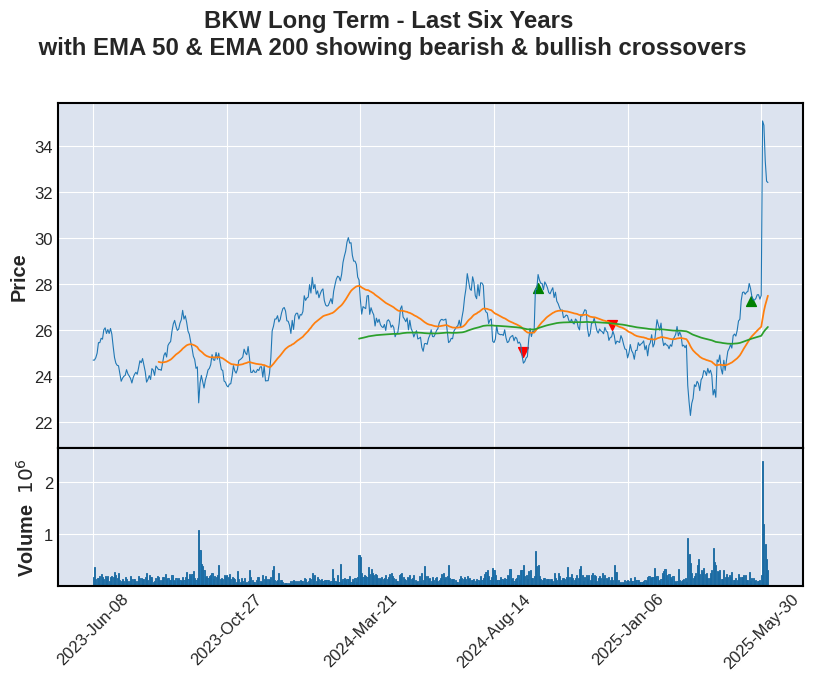

In [14]:
emas = df[['ema_50', 'ema_200']]
apd = [mpf.make_addplot(emas),
        mpf.make_addplot(df['bull_signal_50_200'], type='scatter',markersize=50,marker='^', color='green'),
        mpf.make_addplot(df['bear_signal_50_200'], type='scatter',alpha=1.0,markersize=50,marker='v', color = 'red',panel=0),]
mpf.plot(df, type='line', volume=True, title=f'{ticker} Long Term - Last Six Years\n with EMA 50 & EMA 200 showing bearish & bullish crossovers', figratio=(3,2), figscale=1.20, addplot=apd)

In [15]:
signals_20_50 = bull_bear(df, 'ema_20', 'ema_50')
df['bull_signal_20_50'] = signals_20_50[0]
df['bear_signal_20_50'] = signals_20_50[1]
df.tail(3)

,date,open,high,low,close,volume,ema_5,prior_ema_5,ema_20,prior_ema_20,ema_50,prior_ema_50,ema_200,prior_ema_200,bull_signal_50_200,bear_signal_50_200,bull_signal_20_50,bear_signal_20_50
Datetime,,,,,,,,,,,,,,,,,,
2025-06-04,2025-06-04,34.98,35.20,32.90,33.37,803355,32.219229,31.643843,28.963751,28.499936,27.084622,26.828076,26.011503,25.937548,NaN,NaN,NaN,NaN
2025-06-05,2025-06-05,33.28,33.37,32.27,32.48,528034,32.306153,32.219229,29.298632,28.963751,27.296206,27.084622,26.075866,26.011503,NaN,NaN,NaN,NaN
2025-06-06,2025-06-06,32.02,32.56,32.02,32.42,301923,32.344102,32.306153,29.595905,29.298632,27.497139,27.296206,26.138992,26.075866,NaN,NaN,NaN,NaN


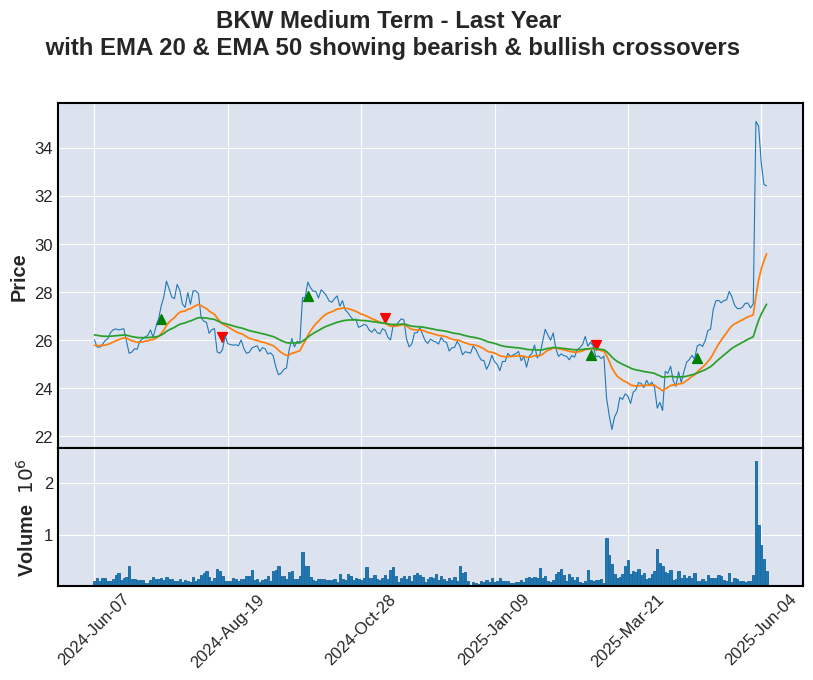

In [16]:
oneyear = df.loc[one_year_ago_string_datetime:end_string_datetime,:]
emas = oneyear[['ema_20', 'ema_50']]
apd = [mpf.make_addplot(emas),
        mpf.make_addplot(oneyear['bull_signal_20_50'], type='scatter',markersize=50,marker='^', color='green'),
        mpf.make_addplot(oneyear['bear_signal_20_50'], type='scatter',alpha=1.0,markersize=50,marker='v', color = 'red',panel=0),]
mpf.plot(oneyear, type='line', volume=True, title=f'{ticker} Medium Term - Last Year\n with EMA 20 & EMA 50 showing bearish & bullish crossovers', figratio=(3,2), figscale=1.20, addplot=apd)



In [17]:
signals_5_20 = bull_bear(df, 'ema_5', 'ema_20')
df['bull_signal_5_20'] = signals_5_20[0]
df['bear_signal_5_20'] = signals_5_20[1]

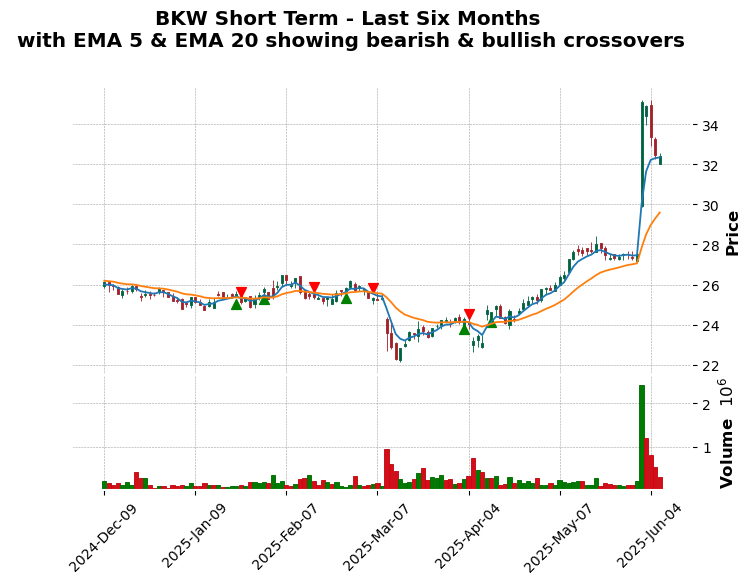

In [18]:
sixmonth = df.loc[six_months_ago_string_datetime:end_string_datetime,:]
emas = sixmonth[['ema_5', 'ema_20']]
apd = [mpf.make_addplot(sixmonth['bull_signal_5_20'],type='scatter',markersize=50,marker='^',color='green'),
        mpf.make_addplot(sixmonth['bear_signal_5_20'],type='scatter',markersize=50,marker='v',color ='red'),
        mpf.make_addplot(emas)]
mpf.plot(sixmonth, type='candle', volume=True, style='charles', title=f'{ticker} Short Term - Last Six Months\n with EMA 5 & EMA 20 showing bearish & bullish crossovers', figratio=(3,2), figscale=1.00, addplot=apd)

# Alpha Trend Indicator
[mplfinance examples alphatrend indicator](https://github.com/matplotlib/mplfinance/blob/master/examples/indicators/alphatrend.ipynb)

In [19]:
def alphatrend_cal(df):  
    Open = df['open']
    Close = df['close']
    High = df['high']
    Low = df['low']
    Volume = df['volume']
    ap = 14
    tr = ta.true_range(High, Low, Close)
    atr = ta.sma(tr, ap)
    noVolumeData = False
    coeff = 1
    upt = []
    downT = []
    AlphaTrend = [0.0]
    src = Close
    rsi = ta.rsi(src, 14)
    hlc3 = []
    k1 = []
    k2 = []
    mfi = ta.mfi(High, Low, Close, Volume, 14)
    for i in range(len(Close)):
        hlc3.append((High[i] + Low[i] + Close[i]) / 3)

    for i in range(len(Low)):
        if pd.isna(atr[i]):
            upt.append(0)
        else:
            upt.append(Low[i] - (atr[i] * coeff))
    for i in range(len(High)):
        if pd.isna(atr[i]):
            downT.append(0)
        else:
            downT.append(High[i] + (atr[i] * coeff))
    for i in range(1, len(Close)):
        if noVolumeData is True and rsi[i] >= 50:
            if upt[i] < AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(upt[i])

        elif noVolumeData is False and mfi[i] >= 50:
            if upt[i] < AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(upt[i])
        else:
            if downT[i] > AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(downT[i])

    for i in range(len(AlphaTrend)):
        if i < 2:
            k2.append(0)
            k1.append(AlphaTrend[i])
        else:
            k2.append(AlphaTrend[i - 2])
            k1.append(AlphaTrend[i])

    df['k1'] = k1
    df['k2'] = k2
    return df

In [20]:
alphatrend = alphatrend_cal(df).tail(90)

/tmp/ipykernel_276982/3981535382.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hlc3.append((High[i] + Low[i] + Close[i]) / 3)
/tmp/ipykernel_276982/3981535382.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(atr[i]):
/tmp/ipykernel_276982/3981535382.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upt.append(Low[i] - (atr[i] * coeff))
/tmp/ipykernel_276982/3981535382.py:30: FutureWarning: Series.__getitem__

In [21]:
# Data Extracted And New Variable Applied
k1 = alphatrend[['k1']]
k2 = alphatrend[['k2']]

In [22]:
fill_up = dict(y1 = alphatrend['k1'].values, y2 = alphatrend['k2'].values, where = alphatrend['k1'] >= alphatrend['k2'], color = '#00E60F')
fill_down = dict(y1 = alphatrend['k1'].values, y2 = alphatrend['k2'].values, where = alphatrend['k1'] <= alphatrend['k2'], color = '#80000B')

In [23]:
# Plot the Ichimoku Cloud along with the basic OHLCV plot.
# Use make_addplot() to create the addplot dict, and pass that into the plot() function:
ic = [
    #Alpha Trend
    mpf.make_addplot(k1,color = '#0022FC',width=3),
    mpf.make_addplot(k2,color = '#FC0400',width=3),
]

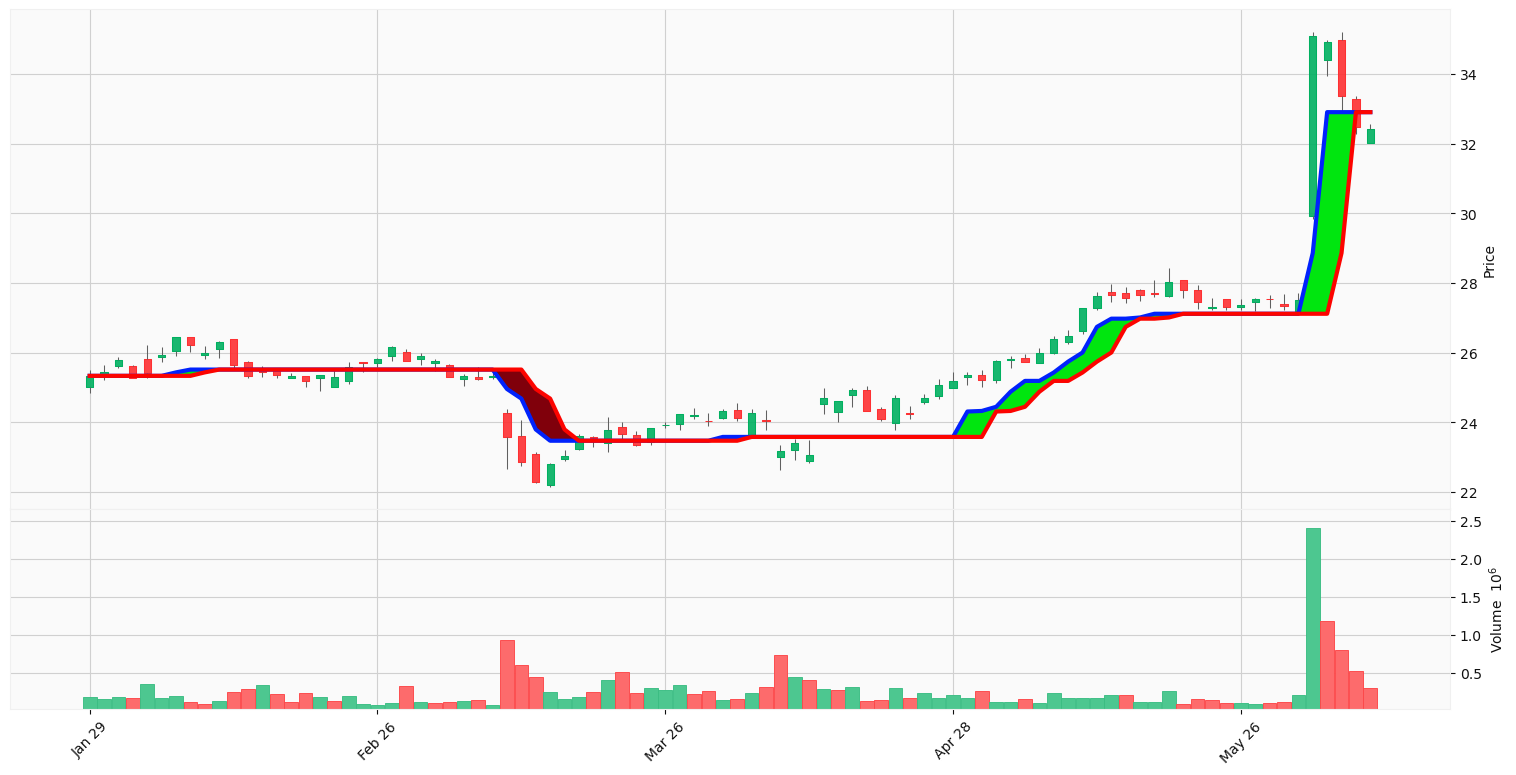

In [24]:
mpf.plot(
    df.tail(90),
    #volume=True,
    type="candle", 
    style="yahoo",
    volume=True,
    addplot=ic,
    fill_between = [fill_up,fill_down],
    figsize=(20,10)
)